In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import mode


from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.utils import to_categorical

from matplotlib import ticker
import time
import warnings

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

In [117]:
train = pd.read_csv('train.csv',encoding = 'utf8')
test = pd.read_csv('test.csv',encoding = 'utf8')

submission = pd.read_csv('sample_submission.csv')

## 데이터 시각화

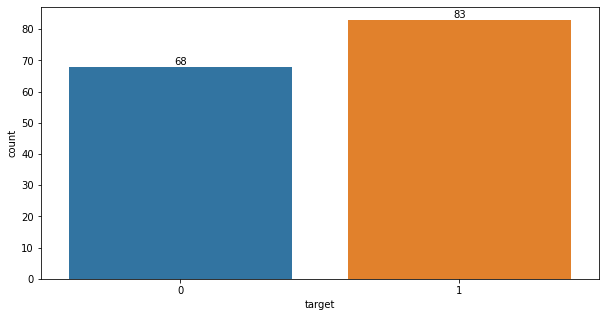

In [118]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=train.target)
plt.xlabel("target")
ax.bar_label(ax.containers[0])
plt.show()

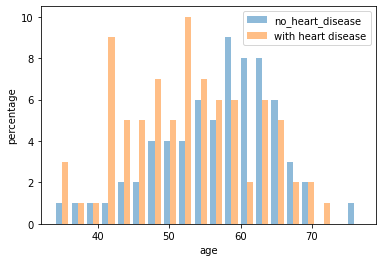

In [119]:
plt.hist(
    [train[train.target==0].age, train[train.target==1].age], 
    bins = 20, alpha = 0.5, 
    label = ["no_heart_disease","with heart disease"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()

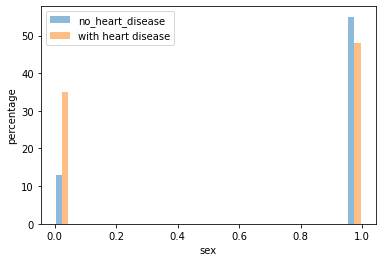

In [120]:
plt.hist(
    [train[train.target==0].sex, train[train.target==1].sex], 
    bins = 20, alpha = 0.5, 
    label = ["no_heart_disease","with heart disease"])
plt.xlabel("sex")
plt.ylabel("percentage")
plt.legend()
plt.show()

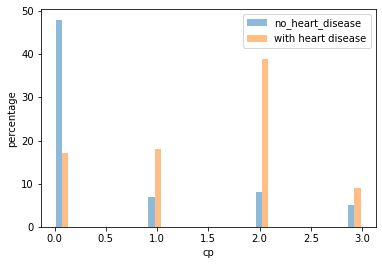

In [121]:
plt.hist(
    [train[train.target==0].cp, train[train.target==1].cp], 
    bins = 20, alpha = 0.5, 
    label = ["no_heart_disease","with heart disease"])
plt.xlabel("cp")
plt.ylabel("percentage")
plt.legend()
plt.show()

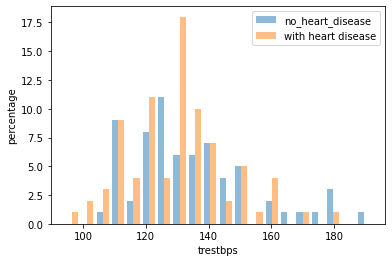

In [122]:
plt.hist(
    [train[train.target==0].trestbps, train[train.target==1].trestbps], 
    bins = 20, alpha = 0.5, 
    label = ["no_heart_disease","with heart disease"])
plt.xlabel("trestbps")
plt.ylabel("percentage")
plt.legend()
plt.show()

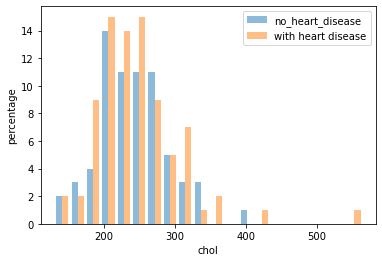

In [123]:
plt.hist(
    [train[train.target==0].chol, train[train.target==1].chol], 
    bins = 20, alpha = 0.5, 
    label = ["no_heart_disease","with heart disease"])
plt.xlabel("chol")
plt.ylabel("percentage")
plt.legend()
plt.show()

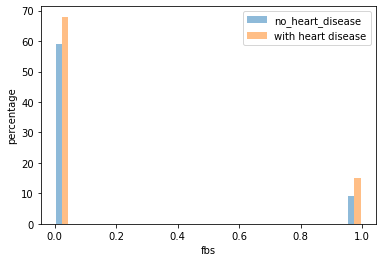

In [124]:
plt.hist(
    [train[train.target==0].fbs, train[train.target==1].fbs], 
    bins = 20, alpha = 0.5, 
    label = ["no_heart_disease","with heart disease"])
plt.xlabel("fbs")
plt.ylabel("percentage")
plt.legend()
plt.show()

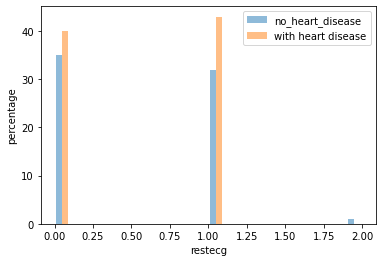

In [125]:
plt.hist(
    [train[train.target==0].restecg, train[train.target==1].restecg], 
    bins = 20, alpha = 0.5, 
    label = ["no_heart_disease","with heart disease"])
plt.xlabel("restecg")
plt.ylabel("percentage")
plt.legend()
plt.show()

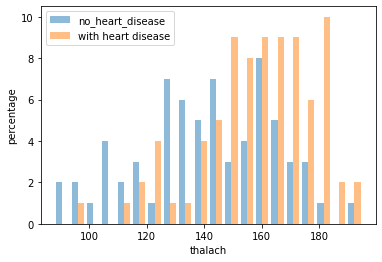

In [126]:
plt.hist(
    [train[train.target==0].thalach, train[train.target==1].thalach], 
    bins = 20, alpha = 0.5, 
    label = ["no_heart_disease","with heart disease"])
plt.xlabel("thalach")
plt.ylabel("percentage")
plt.legend()
plt.show()

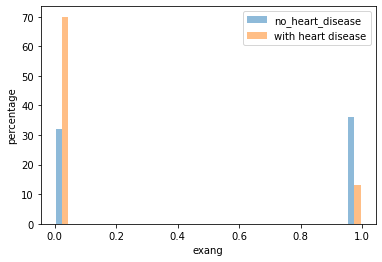

In [127]:
plt.hist(
    [train[train.target==0].exang, train[train.target==1].exang], 
    bins = 20, alpha = 0.5, 
    label = ["no_heart_disease","with heart disease"])
plt.xlabel("exang")
plt.ylabel("percentage")
plt.legend()
plt.show()

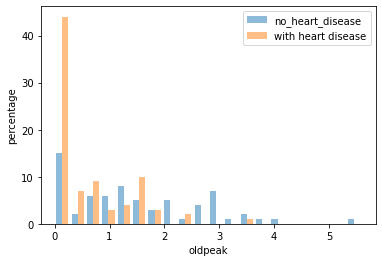

In [128]:
plt.hist(
    [train[train.target==0].oldpeak, train[train.target==1].oldpeak], 
    bins = 20, alpha = 0.5, 
    label = ["no_heart_disease","with heart disease"])
plt.xlabel("oldpeak")
plt.ylabel("percentage")
plt.legend()
plt.show()

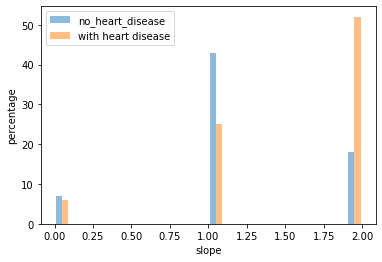

In [129]:
plt.hist(
    [train[train.target==0].slope, train[train.target==1].slope], 
    bins = 20, alpha = 0.5, 
    label = ["no_heart_disease","with heart disease"])
plt.xlabel("slope")
plt.ylabel("percentage")
plt.legend()
plt.show()

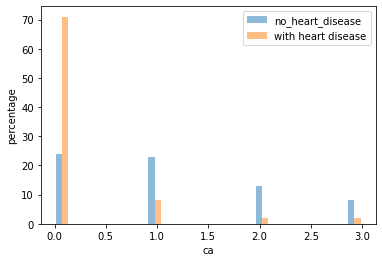

In [130]:
plt.hist(
    [train[train.target==0].ca, train[train.target==1].ca], 
    bins = 20, alpha = 0.5, 
    label = ["no_heart_disease","with heart disease"])
plt.xlabel("ca")
plt.ylabel("percentage")
plt.legend()
plt.show()

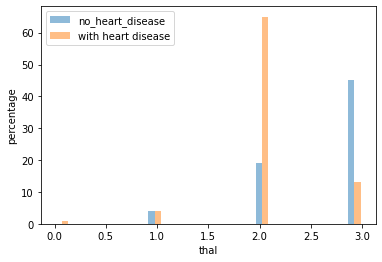

In [131]:
plt.hist(
    [train[train.target==0].thal, train[train.target==1].thal], 
    bins = 20, alpha = 0.5, 
    label = ["no_heart_disease","with heart disease"])
plt.xlabel("thal")
plt.ylabel("percentage")
plt.legend()
plt.show()

## 불필요한 데이터는 사용하지 않음

In [132]:
train.drop(["id"] , axis = 1 , inplace = True)
test.drop(["id"] , axis = 1 , inplace = True)

train.drop(['trestbps'], axis = 1, inplace=True)
test.drop(['trestbps'], axis = 1, inplace=True)

train.drop(['chol'], axis = 1, inplace=True)
test.drop(['chol'], axis = 1, inplace=True)

train.drop(['fbs'], axis = 1, inplace=True)
test.drop(['fbs'], axis = 1, inplace=True)

train.drop(['restecg'], axis = 1, inplace=True)
test.drop(['restecg'], axis = 1, inplace=True)

## catboost 기본 학습 결과

In [344]:
accuracy =[]
model_names =[]

X= train.drop('target', axis=1)
y= train['target']
categorical_features_indices = np.where(X.dtypes != np.float)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1111)

model = CatBoostClassifier(verbose=False,random_state=1111)
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))

model_names = ['Catboost_default']
result_df5 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df5

,Accuracy
Catboost_default,0.811300


## optuna를 활용한 파라미터 최적화

In [345]:
def objective(trial):
    X= train.drop('target', axis=1)
    y= train['target']
    categorical_features_indices = np.where(X.dtypes != np.float)[0]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1111)

    param = {
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.5),
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    cat_cls = CatBoostClassifier(**param)

    cat_cls.fit(X_train, y_train, eval_set=[(X_test, y_test)], cat_features=categorical_features_indices,verbose=0, early_stopping_rounds=100)

    preds = cat_cls.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy

In [346]:
import optuna

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200, timeout=600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2021-12-24 19:19:15,567] A new study created in memory with name: no-name-499a1b7e-8445-4439-b238-9b00f599c1d3
[I 2021-12-24 19:19:15,729] Trial 0 finished with value: 0.8867924528301887 and parameters: {'learning_rate': 0.06782704246876936, 'objective': 'Logloss', 'colsample_bylevel': 0.07396623693224366, 'depth': 2, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.2569045900726271}. Best is trial 0 with value: 0.8867924528301887.
[I 2021-12-24 19:19:15,925] Trial 1 finished with value: 0.9056603773584906 and parameters: {'learning_rate': 0.40737965720186153, 'objective': 'CrossEntropy', 'colsample_bylevel': 0.09988443147866077, 'depth': 7, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 1 with value: 0.9056603773584906.
[I 2021-12-24 19:19:16,230] Trial 2 finished with value: 0.8679245283018868 and parameters: {'learning_rate': 0.4406643070806903, 'objective': 'Logloss', 'colsample_bylevel': 0.09553825278182246, 'depth': 10, 'boosting_type'

Number of finished trials: 200
Best trial:
  Value: 0.9433962264150944
  Params: 
    learning_rate: 0.2705483201444818
    objective: Logloss
    colsample_bylevel: 0.015824521798508302
    depth: 5
    boosting_type: Ordered
    bootstrap_type: Bayesian
    bagging_temperature: 7.240929621997684


## optuna를 통해 나온 파라미터를 사용하여 학습
#### (다시 파리미터 조정 시 이전 파라미터 재현이 되지 않네요)

In [349]:
from sklearn.metrics import accuracy_score, classification_report

accuracy =[]
model_names =[]


X= train.drop('target', axis=1)
y= train['target']
categorical_features_indices = np.where(X.dtypes != np.float)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1111)
        
model = CatBoostClassifier(
    verbose=False,
    learning_rate=0.11318298060181874,
    objective= 'Logloss',
    colsample_bylevel= 0.04636567857984003,
    depth= 3,
    boosting_type= 'Ordered',
    bootstrap_type= 'Bayesian',
    bagging_temperature=0.39557095371902345
)

model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))

y_pred = model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))
print(classification_report(y_test, y_pred))

model_names = ['Catboost_tuned']
result_df6 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df6

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.94      1.00      0.97        29

    accuracy                           0.96        53
   macro avg       0.97      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53



,Accuracy
Catboost_tuned,0.962300


## 최종 결과 확인

In [353]:
y_pred = model.predict(test)

In [354]:
submission = submission.copy()
submission['target'] = y_pred
submission.to_csv("catboost_optuna.csv",index=None)
submission.head()

,id,target
0,1,0
1,2,1
2,3,0
3,4,0
4,5,1


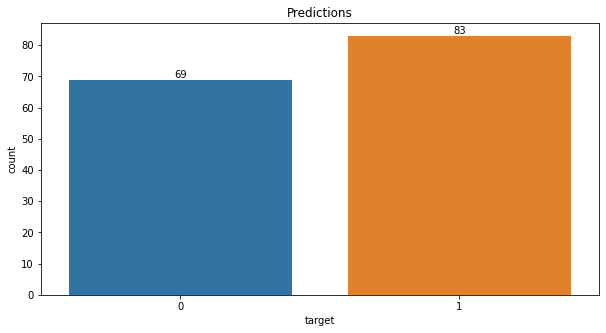

In [355]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=submission.target)
plt.title("Predictions")
plt.xlabel("target")
ax.bar_label(ax.containers[0])
plt.show()